# Variable corrolation

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

In [2]:

%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

from sklearn.model_selection import train_test_split




### Import data

In [3]:
drive = "H"
date = "20240403"

In [4]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
#csv_file = r"{0}:\cdu\data\zonal_stats\output\{1}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(drive, date)
csv_file = r"{0}:\cdu\data\latest_biomass_data\20240402\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv".format(drive)

## Set output file locations

In [5]:
output = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date)
output_ = os.path.join(output, "plots")

In [6]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)

In [7]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(189, 308)
['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'im_date_x', 'band', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 's_date', 'e_date', 'image_s_dt', 'image_e_dt', 'area_ha', 'jan_per', 'feb_per', 'mar_per', 'april_per', 'may_per', 'june_per', 'july_per', 'aug_per', 'sep_per', 'oct_per', 'nov_per', 'dec_per', 'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'year', 'tot_an_emsi_avg', 'tot_an_emsi_avg_R', 'tot_an_emsi_avg_si', 'emsi_dt', 'tot_an_drsi_avg', 'tot_an_drsi_avg_R', 'tot_an_drsi_avg_si', '

In [8]:
df = df2.rename(columns={'bio_agb_kg1ha': 'target'})

In [9]:
df

,uid,site_clean,date,lon_gda94,lat_gda94,bio_l_kg1ha,bio_t_kg1ha,bio_b_kg1ha,bio_w_kg1ha,bio_br_kg1ha,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
0,71,nt001.2011,20110523,131.21,-13.95,0.00,0.00,0.00,0.00,0.00,...,-963139.00,963139.00,2033821.00,-266174.00,1873000.00,2729666.00,1711000.00,3000000.00,4812940.00,6898960.00
1,24,barkely01.2011,20111025,135.04,-18.00,0.00,0.00,0.00,0.00,0.00,...,-1995622.00,1995622.00,1967000.00,-635406.00,1659000.00,1598441.00,1112000.00,1774468.00,2527273.00,2947583.00
2,26,barkely03.2011,20111026,135.29,-18.02,0.00,0.00,0.00,0.00,0.00,...,-1703353.00,1703353.00,2254432.00,-530218.00,1713000.00,1708085.00,1210000.00,1877716.00,2593228.00,3039292.00
3,27,barkely04.2011,20111026,135.23,-17.98,0.00,0.00,0.00,0.00,0.00,...,-2256318.00,2256318.00,2646032.00,-303355.00,1859000.00,2027352.00,1359000.00,2246281.00,3334969.00,4144739.00
4,25,barkely02.2011,20111026,135.26,-18.06,0.00,0.00,0.00,0.00,0.00,...,-2041078.00,2041078.00,3188841.00,399323.00,2143000.00,2429125.00,1666000.00,2636076.00,3718750.00,4778632.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,146,site09.2023,20230910,131.02,-13.03,667.18,724.61,2494.07,12832.36,5728.27,...,-1224670.00,1224670.00,3746719.00,448878.00,1597000.00,2492933.00,1458000.00,2828505.00,5336750.00,8135198.00
185,159,site23.2023,20230916,132.54,-12.66,320.02,347.99,1359.66,4423.39,3354.31,...,-1149782.00,1149782.00,-32626.00,-1256857.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
186,156,site20.2023,20230916,131.56,-12.81,602.67,654.04,2204.47,11815.54,5206.21,...,-1419985.00,1419985.00,3493902.00,377491.00,1642000.00,2420572.00,1453000.00,2733601.00,4887319.00,7064121.00
187,157,site21.2023,20230916,131.57,-12.82,1934.59,2097.90,5741.75,22983.80,12704.86,...,-1072797.00,1072797.00,5216990.00,1735106.00,2006000.00,3235163.00,1894000.00,3529193.00,6209836.00,10680466.00


## Main only

In [10]:
#main only
var_ = "main_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

In [11]:
df2

,site_clean,target,fire_mean,fire_major,rh_tmin_mean,b1_wfp_mean,b1_wdc_major,b1_n17_major,b1_hsd_mean,b1_hmc_mean,...,b1_ccw_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b4_dbifm_dry_mean,b5_dbifm_dry_mean,b6_dbifm_dry_mean
0,nt001.2011,0.00,0.00,0.00,3368.30,69.89,3.00,4.00,102.31,105.91,...,88.67,394.67,10.33,62.56,25.67,760.33,922.56,2633.89,2777.78,1743.22
1,barkely01.2011,0.00,0.00,0.00,3353.40,5.12,1.00,3.00,101.61,102.74,...,9.88,613.33,4.11,2.11,92.33,1097.78,1644.89,2756.00,3130.33,1850.89
2,barkely03.2011,0.00,0.00,0.00,3359.00,17.00,1.00,6.00,100.92,101.85,...,29.00,675.56,3.44,4.22,90.67,1225.89,1728.67,2938.67,3267.11,1857.33
3,barkely04.2011,0.00,0.00,0.00,3358.10,4.00,1.00,3.00,101.98,103.76,...,2.00,457.78,4.44,3.67,90.11,858.00,1358.11,2717.56,2887.11,1580.67
4,barkely02.2011,0.00,0.00,0.00,3357.80,8.56,1.00,3.00,100.94,102.91,...,15.33,470.67,8.89,0.22,89.78,930.33,1407.67,3073.11,2837.67,1587.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,site09.2023,21703.03,5.00,5.00,3376.50,47.44,3.00,8.00,104.68,109.46,...,70.11,303.56,2.00,45.78,50.89,498.78,637.78,2095.22,1915.44,953.56
185,site23.2023,9471.00,5.00,5.00,3373.30,16.33,2.00,8.00,103.50,104.50,...,28.33,441.11,24.44,27.78,46.33,712.67,897.67,1833.33,2360.00,1845.44
186,site20.2023,19813.34,0.00,0.00,3376.50,39.33,3.00,1.00,103.35,107.11,...,60.33,332.33,2.67,42.11,53.67,571.22,760.89,2213.67,2052.11,1067.00
187,site21.2023,43331.12,0.00,0.00,3376.50,61.78,3.00,5.00,105.12,112.38,...,82.78,254.44,2.56,56.00,39.78,466.44,578.22,2472.89,1741.44,777.22


## Main and Major Only

In [12]:
#main and major only
var_ = "main_major_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

## Main and veg indicies

In [13]:
# var_ = "main_veg_indicies"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
#  'dbifmdry_GNDVI',
#  'dbifmdry_CVI',
#  #'dbifmdry_NDGI',
#  'dbifmdry_RI',
#  'dbifmdry_NBR',
#  #'dbifmdry_NDII',
#  'dbifmdry_GDVI',
#  'dbifmdry_MSAVI',
#  'dbifmdry_DVI',
#  'dbifmdry_SAVI',
#  'dbifmdry_NDVI',
#  'dbifmdry_MSR']
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

# del df2['fire_mean']
# del df2['rh_tmin_mean']

## Main, veg indicies and fire

In [14]:
# var_ = "main_veg_indicies_fire"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
#  'dbifmdry_GNDVI',
#  'dbifmdry_CVI',
#  'dbifmdry_NDGI',
#  'dbifmdry_RI',
#  'dbifmdry_NBR',
#  'dbifmdry_NDII',
#  'dbifmdry_GDVI',
#  'dbifmdry_MSAVI',
#  'dbifmdry_DVI',
#  'dbifmdry_SAVI',
#  'dbifmdry_NDVI',
#  'dbifmdry_MSR',
#        #'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 
#        # 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10',
#        ]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

## Remove all target == 0 values

In [15]:
df2 = df2[df2['target']>0.0]
df2.shape

(132, 23)

### Remove all outliers 3 std deviations above the mean

In [67]:
import pandas as pd

def filter_outliers(df):
    filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data
    
    for column in df.columns[4:]:
        print("_"*20)
        print("column: ", column)
        column_data = df[column]
        mean = column_data.mean()
        print("mean: ", mean)
        std_dev = column_data.std()
        print("std_dev: ", std_dev)
        threshold = 3 * std_dev
        print("threshold: ", threshold)
        
        # Define a boolean mask to filter outliers for the current column
        mask = (column_data > (mean - threshold)) & (column_data < (mean + threshold))
        
        # Apply the mask to filter the column data
        filtered_column_data = column_data[mask]
        
        # Assign the filtered column data to the filtered DataFrame
        filtered_df[column] = filtered_column_data
    
    return filtered_df


# Filter outliers
filtered_df = filter_outliers(df2)
# print("Original DataFrame:")
# print(df2)
# print("\nFiltered DataFrame:")
# print(filtered_df)

ft_orig = df2[df2.columns[:4]]
out_df = pd.concat([ft_orig, filtered_df],axis = 1)

____________________
column:  rh_tmin_mean
mean:  3363.0
std_dev:  16.1644142941736
threshold:  48.4932428825208
____________________
column:  b1_wfp_mean
mean:  30.12360075914424
std_dev:  19.498933053997323
threshold:  58.49679916199197
____________________
column:  b1_wdc_major
mean:  2.2956521739130435
std_dev:  0.8268935000421149
threshold:  2.480680500126345
____________________
column:  b1_n17_major
mean:  4.765217391304348
std_dev:  2.517762982248847
threshold:  7.553288946746541
____________________
column:  b1_hsd_mean
mean:  103.01642063297511
std_dev:  1.2652089565178832
threshold:  3.79562686955365
____________________
column:  b1_hmc_mean
mean:  105.75608617889213
std_dev:  2.908176766952009
threshold:  8.724530300856028
____________________
column:  b1_hcv_mean
mean:  154.1342722107576
std_dev:  9.457860305786877
threshold:  28.37358091736063
____________________
column:  b1_h99_mean
mean:  111.54271958524231
std_dev:  4.637131958743631
threshold:  13.911395876230895
___

In [17]:
ft_orig

,site_clean,target,fire_mean,fire_major
7,barkely07.2011,1894.20,0.00,0.00
8,ntagfu0001.2012,1536.15,0.00,0.00
9,ntagfu0002.2012,1164.24,10.00,10.00
10,ntagfu0003.2012,4736.01,0.00,0.00
12,ntagfu0005.2012,1549.09,0.00,0.00
...,...,...,...,...
184,site09.2023,21703.03,5.00,5.00
185,site23.2023,9471.00,5.00,5.00
186,site20.2023,19813.34,0.00,0.00
187,site21.2023,43331.12,0.00,0.00


In [18]:
out_df

,site_clean,target,fire_mean,fire_major,rh_tmin_mean,b1_wfp_mean,b1_wdc_major,b1_n17_major,b1_hsd_mean,b1_hmc_mean,...,b1_ccw_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b4_dbifm_dry_mean,b5_dbifm_dry_mean,b6_dbifm_dry_mean
7,barkely07.2011,1894.20,0.00,0.00,3339.70,4.00,1.00,6.00,100.87,101.66,...,4.00,616.44,3.67,10.67,84.11,1144.89,1585.44,2953.89,3013.67,1741.67
8,ntagfu0001.2012,1536.15,0.00,0.00,3319.60,5.92,1.00,3.00,101.86,102.64,...,10.92,465.33,nan,nan,nan,714.08,968.67,1648.25,2448.58,1707.75
9,ntagfu0002.2012,1164.24,10.00,10.00,3363.80,2.00,1.00,6.00,101.43,102.40,...,2.27,449.42,nan,nan,nan,801.75,1171.92,1869.00,2583.33,1771.25
10,ntagfu0003.2012,4736.01,0.00,0.00,3364.00,8.50,1.00,11.00,102.83,104.48,...,15.17,384.42,nan,nan,nan,657.92,941.83,1577.17,1935.75,1482.25
12,ntagfu0005.2012,1549.09,0.00,0.00,3350.30,32.92,3.00,8.00,103.20,105.79,...,52.75,410.83,nan,nan,nan,696.33,904.00,2020.00,2176.00,1477.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,site09.2023,21703.03,5.00,5.00,3376.50,47.44,3.00,8.00,104.68,109.46,...,70.11,303.56,2.00,45.78,50.89,498.78,637.78,2095.22,1915.44,953.56
185,site23.2023,9471.00,5.00,5.00,3373.30,16.33,2.00,8.00,103.50,104.50,...,28.33,441.11,24.44,27.78,46.33,712.67,897.67,1833.33,2360.00,1845.44
186,site20.2023,19813.34,0.00,0.00,3376.50,39.33,3.00,1.00,103.35,107.11,...,60.33,332.33,2.67,42.11,53.67,571.22,760.89,2213.67,2052.11,1067.00
187,site21.2023,43331.12,0.00,0.00,3376.50,61.78,3.00,5.00,105.12,112.38,...,82.78,254.44,2.56,56.00,39.78,466.44,578.22,2472.89,1741.44,777.22


In [19]:
out_df.to_csv(r"H:\cdu\data\zonal_stats\output\20240403\plots\3_std_error\null_greater_than_three_std_error.csv")

In [20]:
# Check for null values
null_values = out_df.isnull().sum()

In [21]:
null_values

site_clean           0
target               0
fire_mean            0
fire_major           0
rh_tmin_mean         0
b1_wfp_mean          2
b1_wdc_major         2
b1_n17_major         3
b1_hsd_mean          2
b1_hmc_mean          2
b1_hcv_mean          3
b1_h99_mean          2
b1_fdc_major         2
b1_ccw_mean          2
b1_dbifm_dry_mean    7
b1_dp1fm_dry_mean    8
b2_dp1fm_dry_mean    8
b3_dp1fm_dry_mean    7
b2_dbifm_dry_mean    7
b3_dbifm_dry_mean    7
b4_dbifm_dry_mean    7
b5_dbifm_dry_mean    6
b6_dbifm_dry_mean    6
dtype: int64

In [22]:
out_df.dropna(inplace=True)

In [23]:
df2 = out_df
df2.shape

(115, 23)

In [24]:
#df2 = filtered_df

In [25]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [26]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [27]:
column_list = df2.columns
print(column_list)

Index(['site_clean', 'target', 'fire_mean', 'fire_major', 'rh_tmin_mean',
       'b1_wfp_mean', 'b1_wdc_major', 'b1_n17_major', 'b1_hsd_mean',
       'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_major',
       'b1_ccw_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean',
       'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean',
       'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean',
       'b6_dbifm_dry_mean'],
      dtype='object')


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 7 to 188
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site_clean         115 non-null    object 
 1   target             115 non-null    float64
 2   fire_mean          115 non-null    float64
 3   fire_major         115 non-null    float64
 4   rh_tmin_mean       115 non-null    float64
 5   b1_wfp_mean        115 non-null    float64
 6   b1_wdc_major       115 non-null    float64
 7   b1_n17_major       115 non-null    float64
 8   b1_hsd_mean        115 non-null    float64
 9   b1_hmc_mean        115 non-null    float64
 10  b1_hcv_mean        115 non-null    float64
 11  b1_h99_mean        115 non-null    float64
 12  b1_fdc_major       115 non-null    float64
 13  b1_ccw_mean        115 non-null    float64
 14  b1_dbifm_dry_mean  115 non-null    float64
 15  b1_dp1fm_dry_mean  115 non-null    float64
 16  b2_dp1fm_dry_mean  115 non

In [29]:
df2.columns

Index(['site_clean', 'target', 'fire_mean', 'fire_major', 'rh_tmin_mean',
       'b1_wfp_mean', 'b1_wdc_major', 'b1_n17_major', 'b1_hsd_mean',
       'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_major',
       'b1_ccw_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean',
       'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean',
       'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean',
       'b6_dbifm_dry_mean'],
      dtype='object')

### Set variables to plot

In [30]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [31]:
value_y

'b1_wfp_mean'

In [32]:
df2.shape

(115, 23)

In [33]:
output_ = r"H:\cdu\data\zonal_stats\output\20240403\plots\3_std_error"


In [34]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [35]:
df2 = df2[df2['target']>0.0]
df2.shape

(115, 23)

In [36]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [37]:
print(column_list[3:])
print(column_list[1:2])

['fire_major', 'rh_tmin_mean', 'b1_wfp_mean', 'b1_wdc_major', 'b1_n17_major', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_major', 'b1_ccw_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean']
['target']


### Drop AGB numbers which are high

In [38]:
# drop the 7 tern sites that apear to be outliers
df3 =df2[df2[value_x] <= 40000]
df3.to_csv(os.path.join(output_, "{0}_lt_40000.csv".format(value_x)))
drop_sites =df2[df2[value_x] > 40000]
drop_sites.value_counts(['site_clean', value_x, value_y])


site_clean   target    b6_dbifm_dry_mean
site21.2023  43331.12  777.22               1
dtype: int64

In [39]:
df3

,site_clean,target,fire_mean,fire_major,rh_tmin_mean,b1_wfp_mean,b1_wdc_major,b1_n17_major,b1_hsd_mean,b1_hmc_mean,...,b1_ccw_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b4_dbifm_dry_mean,b5_dbifm_dry_mean,b6_dbifm_dry_mean
7,barkely07.2011,1894.20,0.00,0.00,3339.70,4.00,1.00,6.00,100.87,101.66,...,4.00,616.44,3.67,10.67,84.11,1144.89,1585.44,2953.89,3013.67,1741.67
18,ntagfu0010.2012,1293.60,0.00,0.00,3376.50,9.44,1.00,7.00,101.99,103.79,...,16.78,484.56,17.56,16.78,64.11,864.11,1174.78,2075.78,2396.11,1608.22
19,ntagfu0011.2012,2540.85,0.00,0.00,3376.50,6.83,1.00,2.00,101.22,102.20,...,12.33,413.00,4.67,12.67,81.25,614.00,777.58,1483.67,2416.75,1617.00
20,ntagfu0012.2012,1796.67,0.00,0.00,3372.00,17.25,2.00,3.00,102.46,104.03,...,29.83,409.92,8.25,22.17,68.25,625.50,793.67,1585.00,2158.08,1409.83
21,ntagfu0013.2012,2357.23,0.00,0.00,3367.40,19.92,2.00,3.00,102.23,103.70,...,34.00,385.92,6.17,23.25,69.17,621.00,798.50,1642.83,2305.33,1562.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,site13.2023,20381.03,0.00,0.00,3376.50,55.33,3.00,4.00,104.85,109.99,...,77.50,165.75,1.08,47.75,49.67,389.67,435.25,2234.00,1413.92,602.58
184,site09.2023,21703.03,5.00,5.00,3376.50,47.44,3.00,8.00,104.68,109.46,...,70.11,303.56,2.00,45.78,50.89,498.78,637.78,2095.22,1915.44,953.56
185,site23.2023,9471.00,5.00,5.00,3373.30,16.33,2.00,8.00,103.50,104.50,...,28.33,441.11,24.44,27.78,46.33,712.67,897.67,1833.33,2360.00,1845.44
186,site20.2023,19813.34,0.00,0.00,3376.50,39.33,3.00,1.00,103.35,107.11,...,60.33,332.33,2.67,42.11,53.67,571.22,760.89,2213.67,2052.11,1067.00


## Choose which data set to run the models from

In [40]:
df_ml = df3

In [41]:
print(list(df_ml.columns))

['site_clean', 'target', 'fire_mean', 'fire_major', 'rh_tmin_mean', 'b1_wfp_mean', 'b1_wdc_major', 'b1_n17_major', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_major', 'b1_ccw_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean']


In [42]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
print(list(df_ml))

['target', 'fire_mean', 'fire_major', 'rh_tmin_mean', 'b1_wfp_mean', 'b1_wdc_major', 'b1_n17_major', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_major', 'b1_ccw_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean']


In [44]:
df_ml.shape

(114, 22)

In [45]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 7 to 188
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             114 non-null    float64
 1   fire_mean          114 non-null    float64
 2   fire_major         114 non-null    float64
 3   rh_tmin_mean       114 non-null    float64
 4   b1_wfp_mean        114 non-null    float64
 5   b1_wdc_major       114 non-null    float64
 6   b1_n17_major       114 non-null    float64
 7   b1_hsd_mean        114 non-null    float64
 8   b1_hmc_mean        114 non-null    float64
 9   b1_hcv_mean        114 non-null    float64
 10  b1_h99_mean        114 non-null    float64
 11  b1_fdc_major       114 non-null    float64
 12  b1_ccw_mean        114 non-null    float64
 13  b1_dbifm_dry_mean  114 non-null    float64
 14  b1_dp1fm_dry_mean  114 non-null    float64
 15  b2_dp1fm_dry_mean  114 non-null    float64
 16  b3_dp1fm_dry_mean  114 non

In [46]:
df_ml.head(5)

,target,fire_mean,fire_major,rh_tmin_mean,b1_wfp_mean,b1_wdc_major,b1_n17_major,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,...,b1_ccw_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b4_dbifm_dry_mean,b5_dbifm_dry_mean,b6_dbifm_dry_mean
7,1894.20,0.00,0.00,3339.70,4.00,1.00,6.00,100.87,101.66,146.92,...,4.00,616.44,3.67,10.67,84.11,1144.89,1585.44,2953.89,3013.67,1741.67
18,1293.60,0.00,0.00,3376.50,9.44,1.00,7.00,101.99,103.79,152.24,...,16.78,484.56,17.56,16.78,64.11,864.11,1174.78,2075.78,2396.11,1608.22
19,2540.85,0.00,0.00,3376.50,6.83,1.00,2.00,101.22,102.20,148.91,...,12.33,413.00,4.67,12.67,81.25,614.00,777.58,1483.67,2416.75,1617.00
20,1796.67,0.00,0.00,3372.00,17.25,2.00,3.00,102.46,104.03,160.75,...,29.83,409.92,8.25,22.17,68.25,625.50,793.67,1585.00,2158.08,1409.83
21,2357.23,0.00,0.00,3367.40,19.92,2.00,3.00,102.23,103.70,155.95,...,34.00,385.92,6.17,23.25,69.17,621.00,798.50,1642.83,2305.33,1562.25


## Reduce level of 0 values

In [47]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['target']>0.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [48]:
# All variables
df_ml = no0_df

# select variables
#df = select_df
df_ml.shape

(114, 22)

In [49]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 7 to 188
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             114 non-null    float64
 1   fire_mean          114 non-null    float64
 2   fire_major         114 non-null    float64
 3   rh_tmin_mean       114 non-null    float64
 4   b1_wfp_mean        114 non-null    float64
 5   b1_wdc_major       114 non-null    float64
 6   b1_n17_major       114 non-null    float64
 7   b1_hsd_mean        114 non-null    float64
 8   b1_hmc_mean        114 non-null    float64
 9   b1_hcv_mean        114 non-null    float64
 10  b1_h99_mean        114 non-null    float64
 11  b1_fdc_major       114 non-null    float64
 12  b1_ccw_mean        114 non-null    float64
 13  b1_dbifm_dry_mean  114 non-null    float64
 14  b1_dp1fm_dry_mean  114 non-null    float64
 15  b2_dp1fm_dry_mean  114 non-null    float64
 16  b3_dp1fm_dry_mean  114 non

In [50]:
test = df_ml[df_ml['target']==0.0]

In [51]:
test.shape

(0, 22)

In [52]:
df_ml.dropna(inplace=True)

In [53]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 7 to 188
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             114 non-null    float64
 1   fire_mean          114 non-null    float64
 2   fire_major         114 non-null    float64
 3   rh_tmin_mean       114 non-null    float64
 4   b1_wfp_mean        114 non-null    float64
 5   b1_wdc_major       114 non-null    float64
 6   b1_n17_major       114 non-null    float64
 7   b1_hsd_mean        114 non-null    float64
 8   b1_hmc_mean        114 non-null    float64
 9   b1_hcv_mean        114 non-null    float64
 10  b1_h99_mean        114 non-null    float64
 11  b1_fdc_major       114 non-null    float64
 12  b1_ccw_mean        114 non-null    float64
 13  b1_dbifm_dry_mean  114 non-null    float64
 14  b1_dp1fm_dry_mean  114 non-null    float64
 15  b2_dp1fm_dry_mean  114 non-null    float64
 16  b3_dp1fm_dry_mean  114 non

# Scatter plots with error

fire_mean
fire_mean
Regression
slope:  4.4512643283117384e-05
intersept:  1.7138301095140505
r2:  0.1314799159426618
P_value:  0.1631933157013667
std error:  3.171234176071141e-05


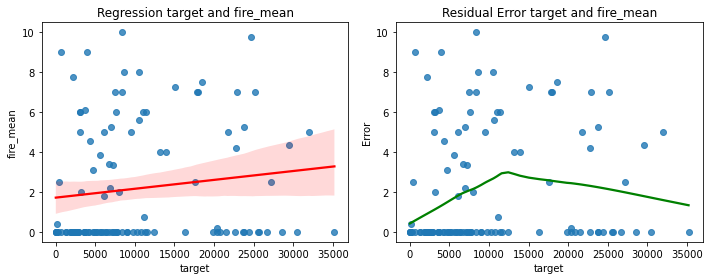

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
fire_major
fire_major
Regression
slope:  3.176777914173768e-05
intersept:  1.7724500777060395
r2:  0.08688698163146395
P_value:  0.3579830276053788
std error:  3.441736310315761e-05


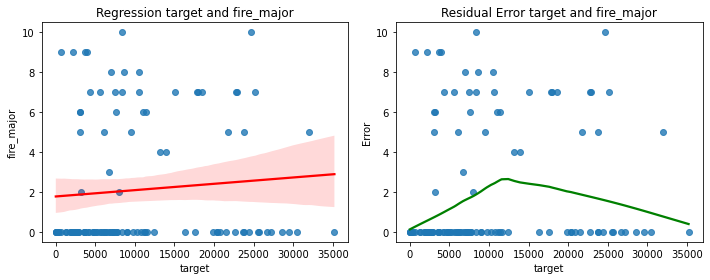

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
rh_tmin_mean
rh_tmin_mean
Regression
slope:  0.0007181408223212314
intersept:  3355.5563209508887
r2:  0.3924704340384629
P_value:  1.568404242421133e-05
std error:  0.00015902681395449738


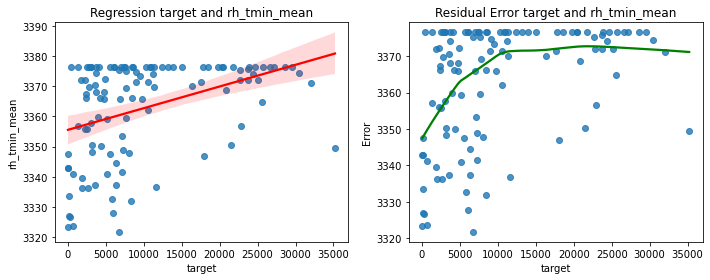

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_wfp_mean
b1_wfp_mean
Regression
slope:  0.0015874471000235802
intersept:  13.653482254166132
r2:  0.7254795137970691
P_value:  6.910469822471198e-20
std error:  0.0001423008127595269


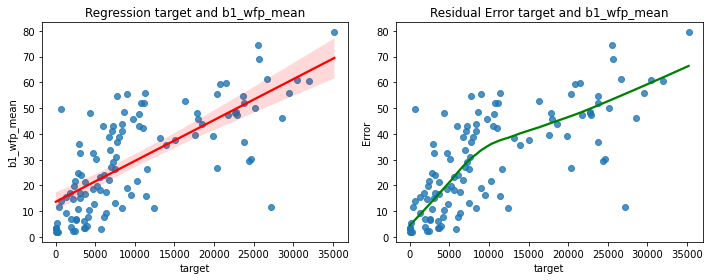

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_wdc_major
b1_wdc_major
Regression
slope:  5.980467397275691e-05
intersept:  1.6794475547533625
r2:  0.6389944816851594
P_value:  2.007339806452967e-14
std error:  6.802595918049363e-06


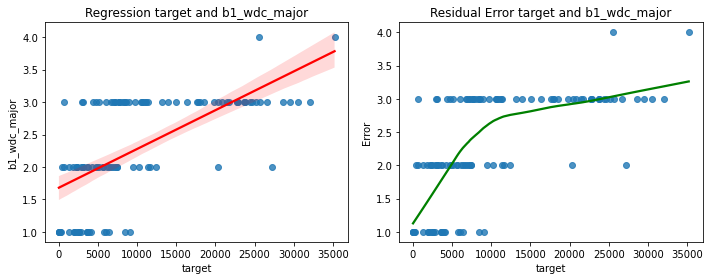

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_n17_major
b1_n17_major
Regression
slope:  -8.0987239120905e-05
intersept:  5.5892527253658475
r2:  -0.283290066910104
P_value:  0.002256621295071897
std error:  2.5906596669280836e-05


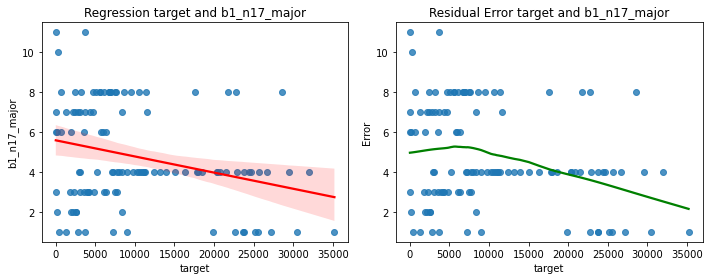

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_hsd_mean
b1_hsd_mean
Regression
slope:  9.315116293147716e-05
intersept:  102.04779329774614
r2:  0.6564765362008971
P_value:  2.1987838336977617e-15
std error:  1.0114185370611478e-05


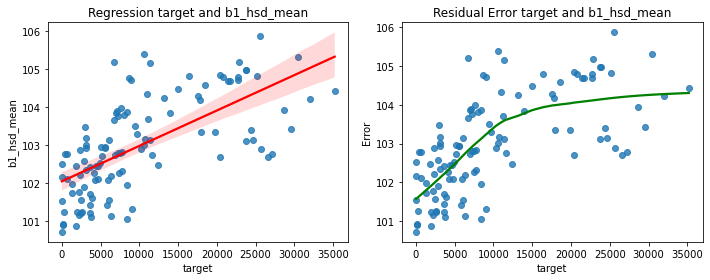

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_hmc_mean
b1_hmc_mean
Regression
slope:  0.00022350541305589475
intersept:  103.41816330447261
r2:  0.692919228646229
P_value:  1.3225810169688805e-17
std error:  2.197560556757442e-05


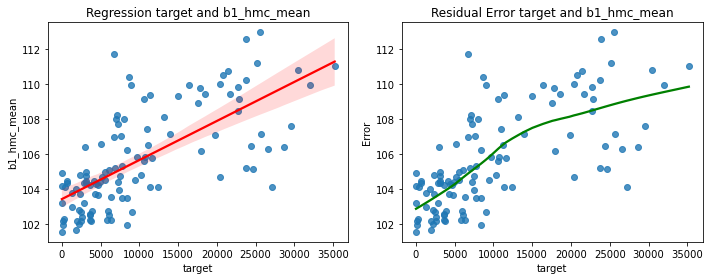

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_hcv_mean
b1_hcv_mean
Regression
slope:  -7.723358460062264e-05
intersept:  155.02188937971053
r2:  -0.07238111636825031
P_value:  0.4440890712338772
std error:  0.0001005613912099146


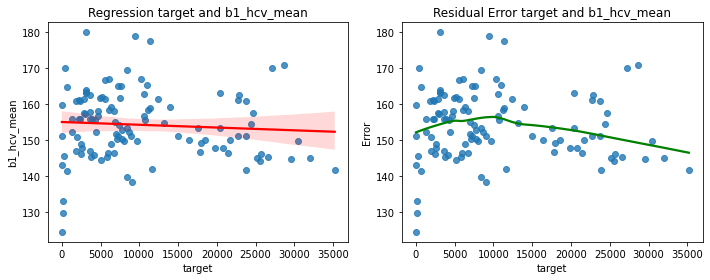

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_h99_mean
b1_h99_mean
Regression
slope:  0.00034775116864354605
intersept:  107.92142732111706
r2:  0.6703602012895188
P_value:  3.4126358707843613e-16
std error:  3.63727595094466e-05


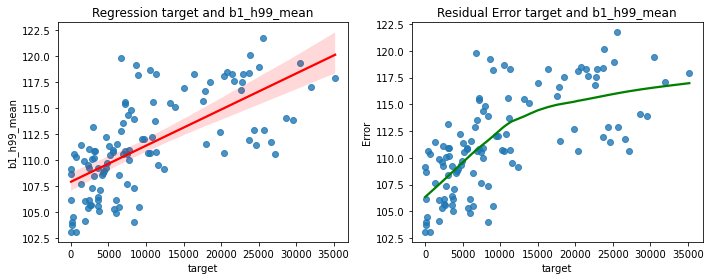

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_fdc_major
b1_fdc_major
Regression
slope:  4.7520142417455174e-05
intersept:  1.9626483043042544
r2:  0.6070251315898139
P_value:  8.101166415296299e-13
std error:  5.878354503193354e-06


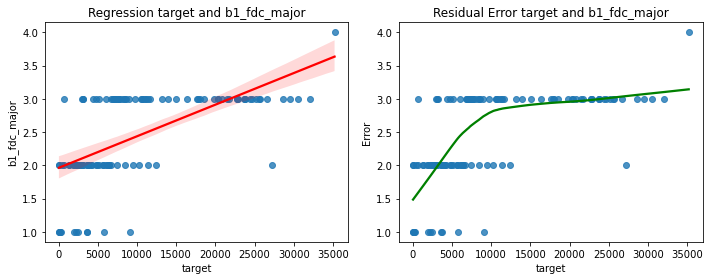

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_ccw_mean
b1_ccw_mean
Regression
slope:  0.002059831200547723
intersept:  23.944060358781428
r2:  0.7030590320365131
P_value:  2.779358017155819e-18
std error:  0.00019687054331808223


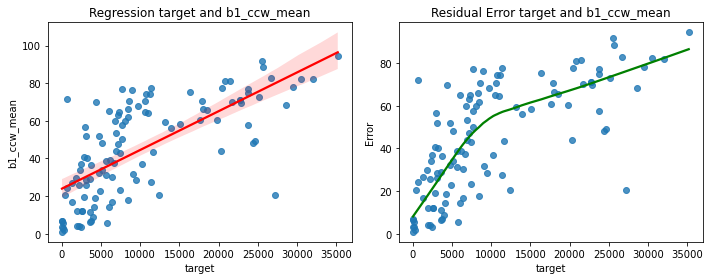

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_dbifm_dry_mean
b1_dbifm_dry_mean
Regression
slope:  -0.008769281333307417
intersept:  472.56975649764917
r2:  -0.6067304488778164
P_value:  8.366031588550872e-13
std error:  0.0010856150977497313


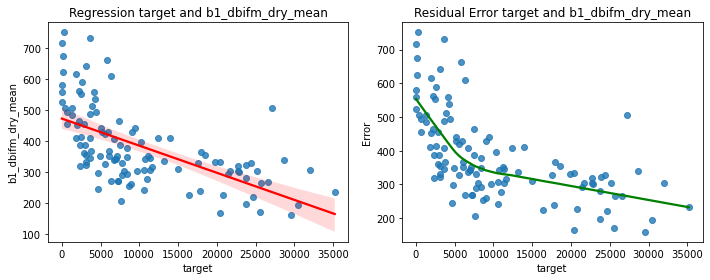

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b1_dp1fm_dry_mean
b1_dp1fm_dry_mean
Regression
slope:  -0.00027448460121195085
intersept:  13.283324887930263
r2:  -0.2750433069510036
P_value:  0.003060081921495467
std error:  9.066222906994757e-05


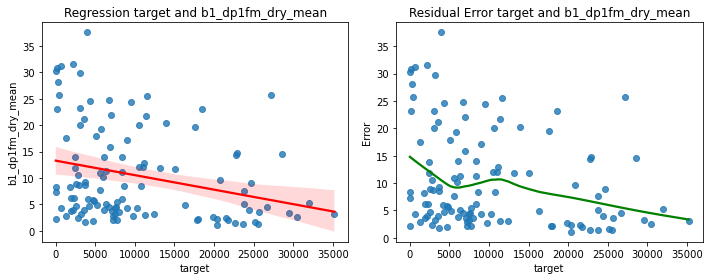

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b2_dp1fm_dry_mean
b2_dp1fm_dry_mean
Regression
slope:  0.0012522736912441205
intersept:  17.599171179976754
r2:  0.6878202977630011
P_value:  2.829237675267929e-17
std error:  0.0001248764923206356


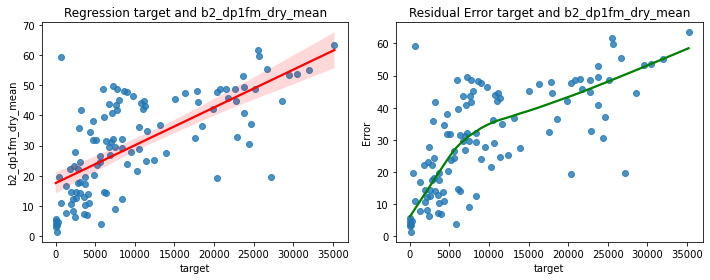

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b3_dp1fm_dry_mean
b3_dp1fm_dry_mean
Regression
slope:  -0.0009778477467600462
intersept:  67.61985267918689
r2:  -0.5841091303858558
P_value:  8.986808086291669e-12
std error:  0.000128395698633567


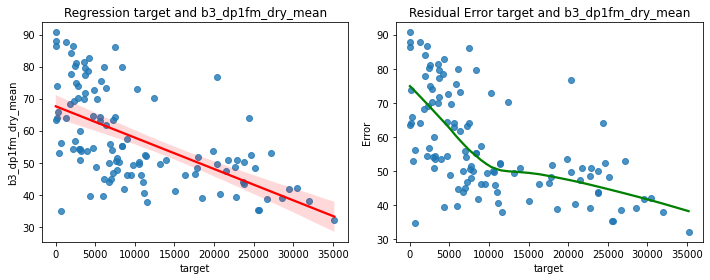

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b2_dbifm_dry_mean
b2_dbifm_dry_mean
Regression
slope:  -0.013578894091408892
intersept:  779.89401148509
r2:  -0.6286570591939231
P_value:  6.952936019408095e-14
std error:  0.0015872451266640455


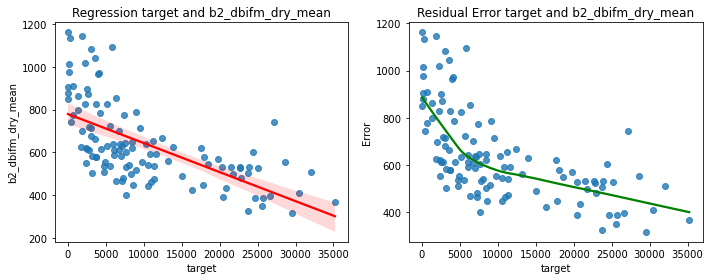

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b3_dbifm_dry_mean
b3_dbifm_dry_mean
Regression
slope:  -0.022984854895182608
intersept:  1119.0500950967005
r2:  -0.6516441409242809
P_value:  4.111017914981161e-15
std error:  0.00252808726254213


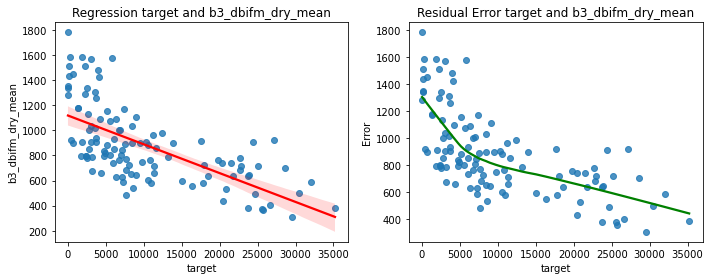

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b4_dbifm_dry_mean
b4_dbifm_dry_mean
Regression
slope:  -0.004490063094834619
intersept:  2090.7644053599947
r2:  -0.13087566492046693
P_value:  0.16515304388694071
std error:  0.00321390411522485


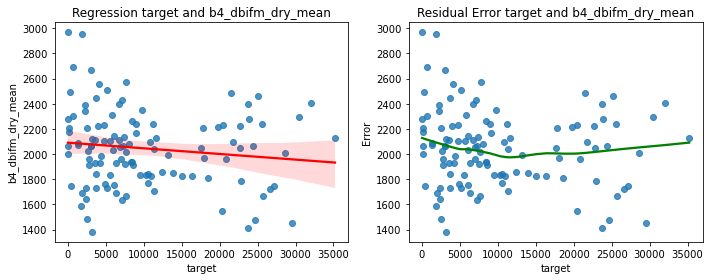

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b5_dbifm_dry_mean
b5_dbifm_dry_mean
Regression
slope:  -0.038237995466141705
intersept:  2690.066086047707
r2:  -0.6671252920942787
P_value:  5.314608027163687e-16
std error:  0.004034625410105058


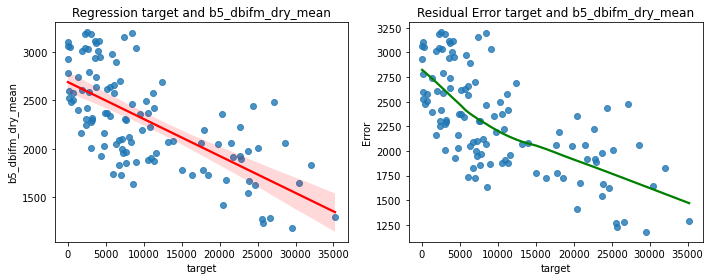

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683
b6_dbifm_dry_mean
b6_dbifm_dry_mean
Regression
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683


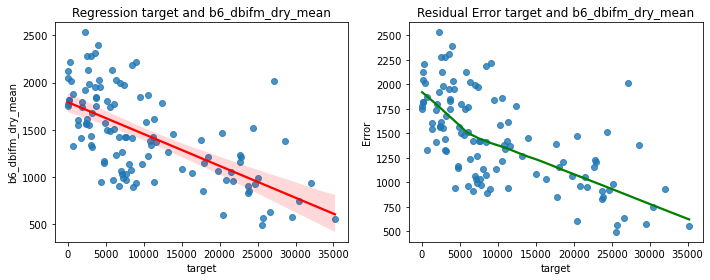

--------------------------------------------------
Residuals
slope:  -0.03372587183424422
intersept:  1792.9043609222183
r2:  -0.6372022769957624
P_value:  2.4981732151304924e-14
std error:  0.0038544312275699683


In [54]:
for i in df_ml.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    print(value_y_loop)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(data = df_ml, x=value_x, y =value_y_loop, line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

    print("="*50)
    print("Regression")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y])

    print("-"*50)
    print("Residuals")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

### Split off unseen data

In [55]:
# Creating a dataframe with 20%
# values of original dataframe
unseen_data = df_ml.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = df_ml.drop(unseen_data.index)

In [56]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(63, 21) (63,)
(28, 21) (28,)


### Plot up Histograms for train and test datasets

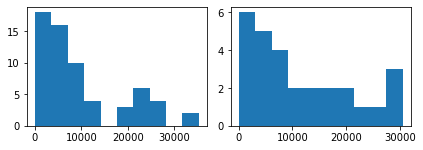

In [57]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [58]:
print(xdata1)

     fire_mean  fire_major  rh_tmin_mean  b1_wfp_mean  b1_wdc_major  \
7         0.00        0.00       3339.70         4.00          1.00   
19        0.00        0.00       3376.50         6.83          1.00   
20        0.00        0.00       3372.00        17.25          2.00   
21        0.00        0.00       3367.40        19.92          2.00   
22        0.00        0.00       3336.30         6.58          1.00   
..         ...         ...           ...          ...           ...   
180       5.00        5.00       3376.50        24.00          2.00   
181       5.00        5.00       3371.20        60.75          3.00   
183       0.00        0.00       3376.50        55.33          3.00   
186       0.00        0.00       3376.50        39.33          3.00   
188       7.00        7.00       3372.00        50.25          3.00   

     b1_n17_major  b1_hsd_mean  b1_hmc_mean  b1_hcv_mean  b1_h99_mean  ...  \
7            6.00       100.87       101.66       146.92       104.14

In [59]:
print(ydata)

[1.8942000e+03 2.5408459e+03 1.7966666e+03 2.3572266e+03 2.6087600e+03
 2.8332131e+03 2.3895994e+03 2.1469141e+04 3.7422000e+03 1.1180400e+04
 2.2699391e+04 4.8727769e+03 5.5881421e+03 8.0314502e+03 3.1569021e+03
 7.6585425e+03 3.1231201e+03 1.7994760e+04 7.7112935e+03 3.9154500e+03
 4.3709121e+03 3.5199711e+04 2.2152900e+03 6.8991998e+02 3.6158325e+03
 6.0447378e+03 3.6687932e+03 3.0861599e+03 2.9521801e+04 2.8320320e+03
 6.6528003e+02 6.0060000e+03 5.1737070e+03 2.4740100e+03 2.3737561e+04
 9.0309453e+03 2.5701689e+04 2.6636295e+04 8.4137900e+03 1.2432934e+04
 2.0359826e+04 1.0273340e+04 7.4328101e+03 7.2401177e+03 1.8480000e+01
 1.2936000e+02 6.6990000e+03 7.3919998e+01 5.5439999e+01 2.2176001e+03
 4.7239990e+03 3.6483931e+03 4.7171880e+03 4.2688799e+03 1.3490400e+03
 3.0861599e+03 7.3919998e+01 3.6036001e+03 6.3756001e+03 2.5585070e+04
 2.2881072e+04 7.1505176e+03 7.4785898e+03 1.0763322e+04 5.7780801e+03
 4.1420864e+03 1.0544602e+04 8.6271875e+03 2.9932466e+03 5.1178052e+03
 1.056

In [64]:
# Prepare data
#X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.3, random_state=42)

# Define Random Forest classifier
rf = rfr()

# Define parameter grid
param_grid = {
    #'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 300],
    #'max_depth': [None, 2], #, 3, 4, 5, 10, 20],
    #'min_samples_split': [1, 2, 3, 4, 5, 10],
    #'min_samples_leaf': [1, 2, 3, 4, 5],
    #'max_features': ['auto', 'sqrt'],
    #'bootstrap': [True, False]
    #'n_estimators': [100, 200, 300],
    #'max_depth': [None, 10, 20],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt'],
    #'bootstrap': [True, False]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_

# Evaluate model performance
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)

print("Best parameters:", best_params)
print("Test accuracy:", test_accuracy)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
# rng = np.random.RandomState(1)
# rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
# rfrModel_1

In [ ]:
# rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
# rfrModel_1

In [ ]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
np.nan_to_num(X_1)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
#rfrLCHM = rfrModel_1.fit(X_1, y_1)
rfrLCHM = best_rf.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_rf_train.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_test_data.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_Band_Importance_Score.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

### Predict the selected model on the test data

In [ ]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [ ]:
df_band.info()

In [ ]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

In [ ]:
df_var = dfsort[dfsort['n'] > 0.01]

In [ ]:
column_var = df_var.band.tolist()

In [ ]:
column_var.insert(0, 'target')

In [ ]:
column_var

In [ ]:
model_data

In [ ]:
select_df = model_data[column_var]

In [ ]:
df_corr = select_df.corr()
df_corr

In [ ]:
dfsort.to_csv(os.path.join(output_, "{0}_rf_variable_score.csv".format(var_)))
df_corr.to_csv(os.path.join(output_, "{0}_rf_select_variable_corrolation.csv".format(var_)))

In [ ]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_variable_score.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
select_df

# Rerun on Selected data

In [ ]:
xdata1 = select_df.iloc[:, 1:].astype('float32')
ydata1 = select_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

In [ ]:
rng = np.random.RandomState(1)
rfrModel_1 = rfr(dtr(max_depth=None), n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=rng)
rfrModel_1

#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [ ]:
select_df

## Re-train model on selected paramiters

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_selectedrf_train.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_selected_rf_test_data.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [ ]:
variable_imp_list = dfsort.band.to_list()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open('rfr_modelName_nt100_n17', 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

df = pd.read_csv(csv_file, header=0)
df.shape 

In [ ]:
c_list = df.columns.tolist()
c_list

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['bio_agb_kg1ha'] > 0.01)]
df1.dropna(inplace=True)
print (df1.shape)

In [ ]:
df1.columns

In [ ]:
column_var

In [ ]:
df1[column_var].info()

In [ ]:
df1

In [ ]:
xdata2 = df1[column_var].astype('float32')

ydata1 = df1[['bio_agb_kg1ha']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print(len(ydata1))

In [ ]:
with open('rfr_modelName_nt100_n17', 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_78.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_l57.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()